## About the dataset

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

**hotel** - The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.

**is_canceled** - Value indicating if the booking was canceled (1) or not (0).

**lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

**arrival_date_year** - Year of arrival date.

**arrival_date_month** - Month of arrival date with 12 categories: “January” to “December”

**arrival_date_week_number** - Week number of the arrival date

**arrival_date_day_of_month** - Day of the month of the arrival date

**stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights.

**Adults** - Number of adults

**Children** - Number of children

**Babies** - Number of babies

**Meal** - BB – Bed & Breakfast

**Country** - Country of origin.

**Market_segment** - Market segment designation.

**• TA** - Travel Agents

**• TO** - Tour Operators

**Distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons

**assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

**booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**Deposit_type**

**• No Deposit** – no deposit was made;

**• Non Refund** – a deposit was made in the value of the total stay cost;

**• Refundable** – a deposit was made with a value under the total cost of stay.

**Agent** - ID of the travel agency that made the booking

**company - ID** of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

**Customer_type**

**• Group** – when the booking is associated to a group;

**• Transient** – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr** - Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

**required_car_parking_spaces** - Number of car parking spaces required by the customer

**total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

**Reservation_status**

**• Check-Out** – customer has checked in but already departed;

**• No-Show** – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel



## Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lower cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to adress this problem.

## Assumptions

1. No unusual occurences between 2015 and 2017 will have a substantial impact on the data used.
2. The information is still current and can be used to analyze a Hotels' possible plans in an efficient manner.
3. There are no unanticipitated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make Hotel reservations the same year they make cancellations.

## Research Question

1. What are the variables that affect the Hotel reservation cancellations?
2. How can we make the hotel reservation cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

## Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

## Analysis & Findings:

## Imporing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")
import calendar

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv("/kaggle/input/hotel-booking/hotel_bookings 2.csv")

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
df.describe(include= 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
#check for the unique values

for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['company', 'agent'], axis=1, inplace= True)

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


## Note:

*There is a clear outlier in adr as the max value of adr(average daily rate) is very high in comparison to its mean value.*


In [16]:
df = df[df['adr']<5000]

# Data Analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

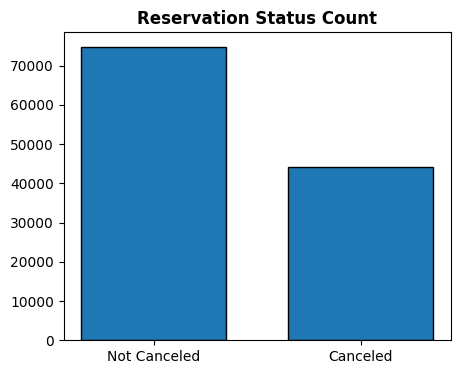

In [17]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation Status Count', weight='bold')
plt.bar(['Not Canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor= 'k', width= 0.7)

## Note: 

***The bar graph illustrates reservation cancellation percentages, revealing a substantial portion of reservations that remain unaffected. Nonetheless, a noteworthy 37% of customers opted to cancel their bookings, significantly impacting the revenue of hotels.***

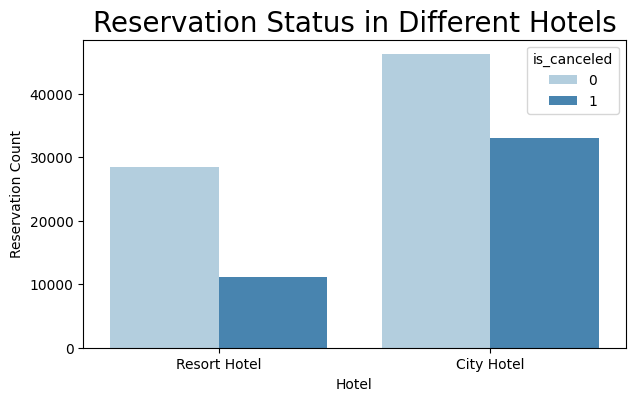

In [18]:
plt.figure(figsize = (7,4))
ax1= sns.countplot( x='hotel', hue= 'is_canceled', data=df, palette = 'Blues')

legend_labels,_= ax1.get_legend_handles_labels()
plt.title ('Reservation Status in Different Hotels', size=20)
plt.xlabel("Hotel")
plt.ylabel('Reservation Count')
plt.show()

## Note:


***City Hotels seem to attract more bookings compared to Resort Hotels. This inclination might suggest that Resort accommodations are relatively pricier than their urban counterparts.***

In [19]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [20]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [21]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

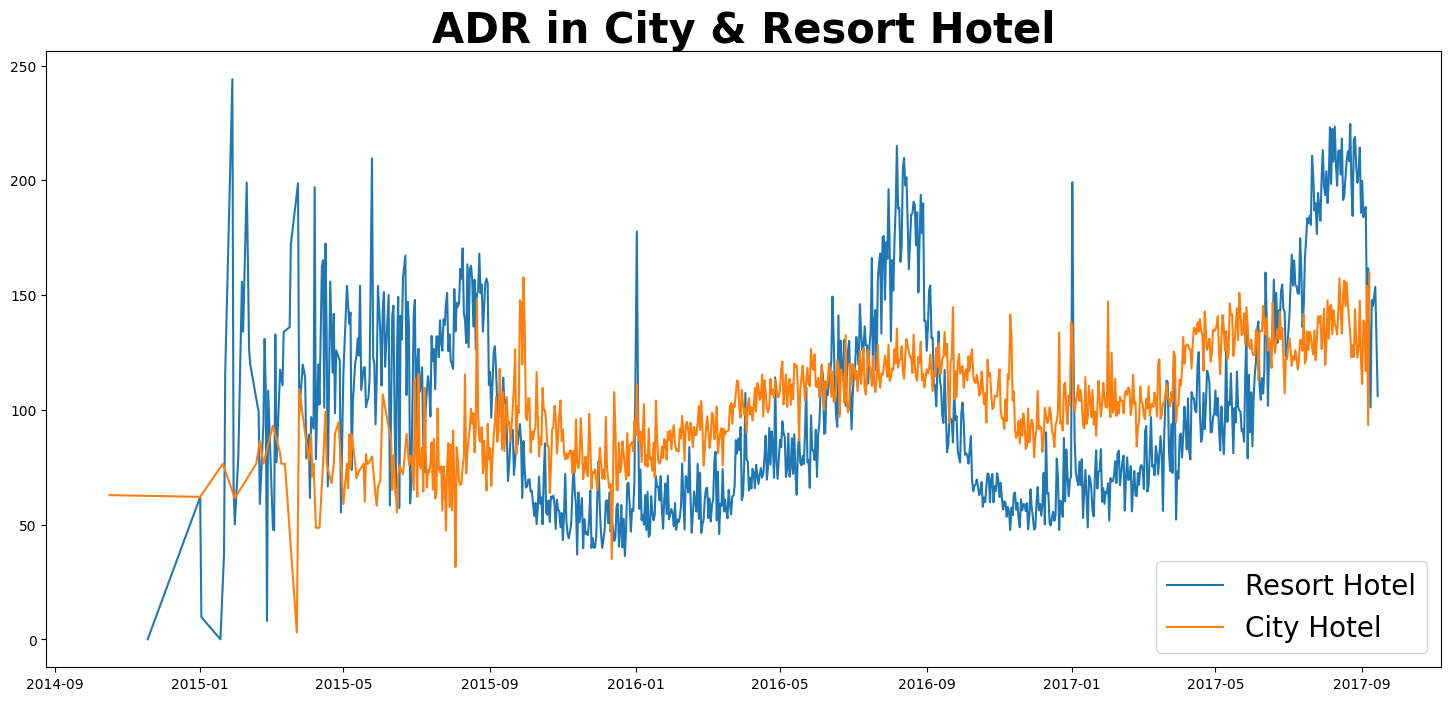

In [22]:
plt.figure(figsize = (18,8))
plt.title('ADR in City & Resort Hotel', weight='bold',fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label= 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

## Note:

***The depicted line graph illustrates fluctuations in the average daily rates between city and Resort Hotels. It notably demonstrates instances where the city hotel rates dip below those of the Resort Hotel. Furthermore, discernible patterns suggest potential increases in Resort hotel rates during weekends and holidays.***






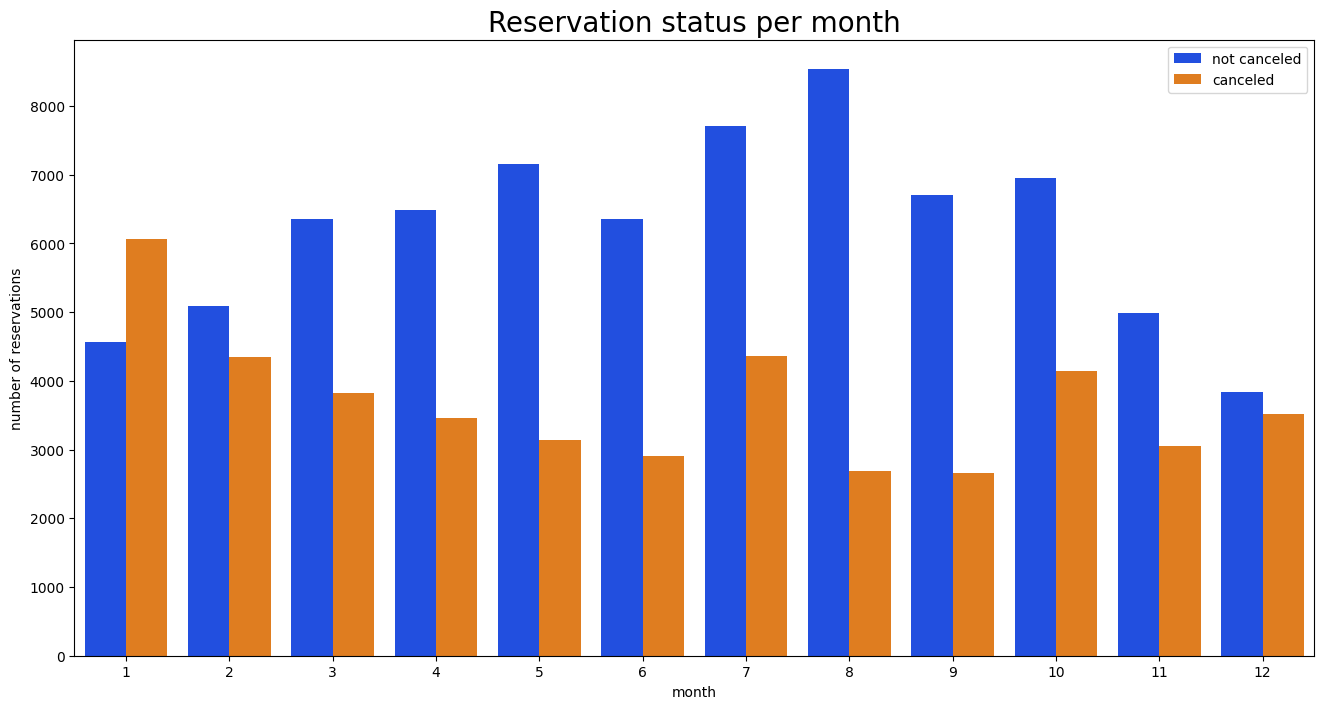

In [23]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax = sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')

legend_labels,_ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor = (1,1))

plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

## Note:

*We've constructed a grouped bar graph to meticulously examine reservation volumes across various months based on reservation statuses. The analysis reveals a notable pattern:*

***• August stands out with the highest count for both confirmed and canceled reservations.***

***• Conversely, January records the highest count specifically for canceled reservations.***

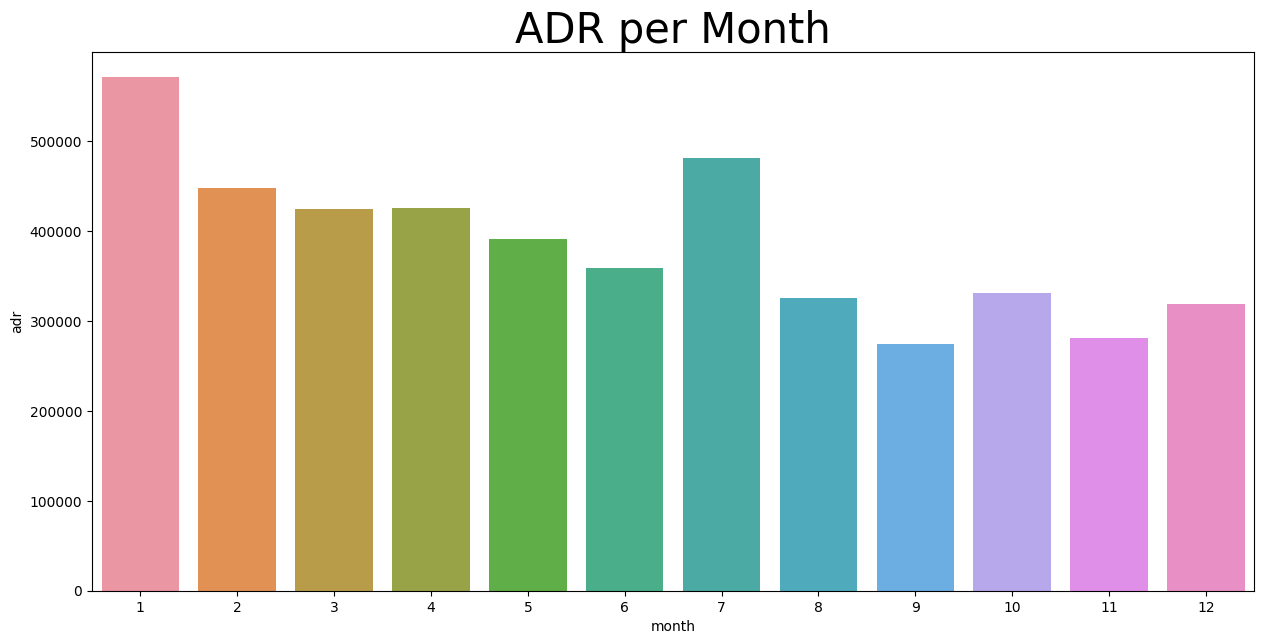

In [24]:
plt.figure(figsize=(15, 7))
plt.title('ADR per Month', fontsize=30)
data_to_plot = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month', y='adr', data=data_to_plot)
plt.show()

## Note:

***The bar graph illustrates a clear correlation between the frequency of cancellations and pricing. It showcases a trend where cancellations are more prevalent during periods of elevated prices and notably less frequent during lower-priced intervals. This observation strongly suggests that pricing significantly influences the decision-making process leading to cancellations.***

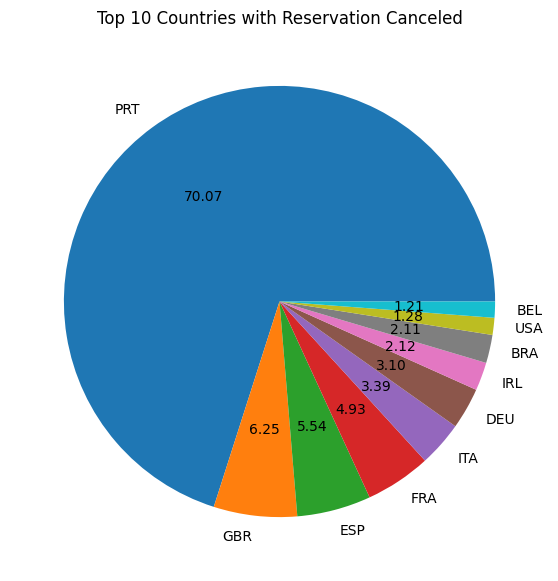

In [25]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(7,7))
plt.title('Top 10 Countries with Reservation Canceled')
plt.pie(top_10_country, autopct='%.2f',labels = top_10_country.index)
plt.show()

## Note:

***Portugal emerges as the leading country in terms of canceled reservations, constituting approximately 70% of the total cancellations. This significant statistic underscores Portugal's prominence in the cancellation rate among all countries.***

## Note:
*Let's examine the primary sources of guests visiting the hotel. This analysis will focus on distinguishing between direct bookings, group arrangements, and the varying channels such as online and offline travel agents through which guests make their reservations.*

In [26]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [27]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [28]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

## Note:

***Approximately 46% of the clientele originates from Online Travel Agencies, followed by 27% from Group bookings. A mere 4% of clients opt for direct hotel bookings by physically visiting the premises.***

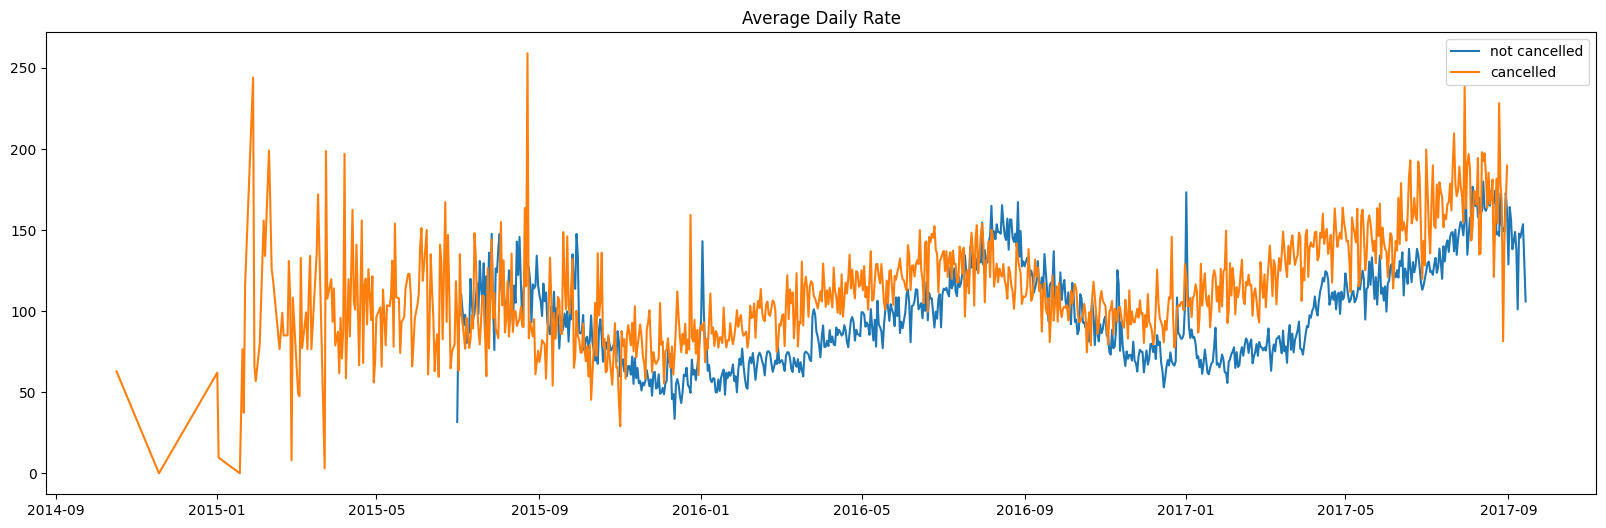

In [29]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='not cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='cancelled')
plt.legend()

## Note:

*To enhance data consistency and provide a clearer picture, we'll refine the dataset by filtering records between the dates of 2016 and 2017. This targeted timeframe will help eliminate inconsistencies and ensure a more focused analysis, thereby refining the insights derived from the dataset.*

In [30]:
cancelled_data_adr = cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') & (cancelled_data_adr['reservation_status_date']<'2017')]
not_cancelled_data_adr = not_cancelled_data_adr[(not_cancelled_data_adr['reservation_status_date']>'2016') & (not_cancelled_data_adr['reservation_status_date']<'2017')]

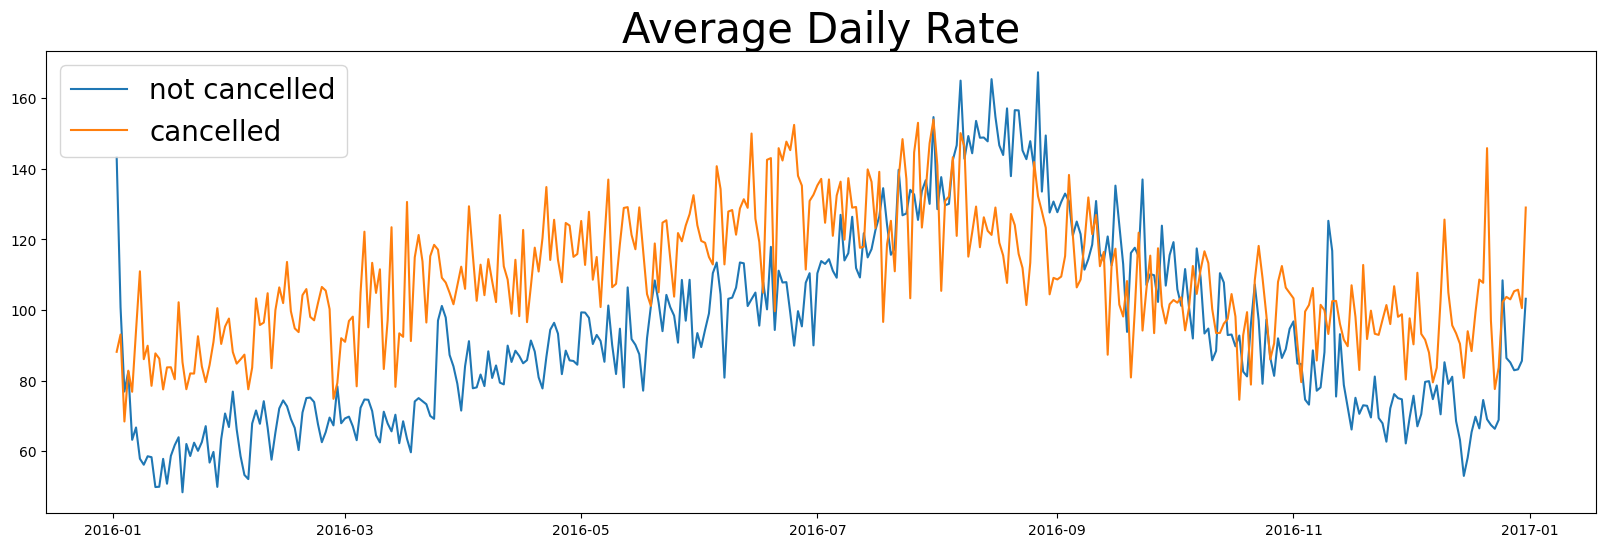

In [31]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate',fontsize=30)
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='not cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='cancelled')
plt.legend(fontsize=20)

## Note:

***The data vividly portrays a direct relationship between reservation cancellations and increased average daily rates. This substantiates the analysis that higher prices directly contribute to a rise in cancellations.***

## Key Insights:

*• The discernible correlation between pricing and cancellation rates highlights a critical aspect impacting hotel revenue. Elevated prices tend to trigger a higher frequency of reservation cancellations, significantly influencing the overall revenue stream.*

*• City Hotels, being the more preferred choice over Resort Hotels, might signify a pricing advantage for city accommodations. This preference potentially reflects a perception of lower costs associated with city stays.*

*• Moreover, fluctuations in average daily rates between City and Resort Hotels indicate a competitive edge during certain periods, particularly when city hotel rates dip below those of Resort Hotels. Weekends and holidays, showcasing potential increases in Resort hotel rates, reflect an opportunity to capitalize on these peak periods.*

*• The concentration of canceled reservations in August and the noticeable spike in January, particularly in cancellations, underscore the need for targeted strategies during these months. These insights can drive focused marketing or pricing initiatives to manage cancellations effectively and optimize revenue streams.*

*• Furthermore, the dominance of Portugal in reservation cancellations highlights an area for deeper investigation. Understanding the underlying factors driving this trend can aid in devising targeted measures to mitigate cancellations from this region.*

*• The prevalence of Online Travel Agencies and Group bookings signals a substantial reliance on intermediaries for reservations. However, the low percentage of direct bookings accentuates the potential for enhancing direct booking strategies.*



## Recommendations:

**1. Pricing Strategies:**

*• Implement dynamic pricing models that adjust rates during high-cancellation periods like August and January. Consider offering incentives or discounts during these months to mitigate cancellations.*

*• Conduct market research to ascertain competitive pricing relative to City and Resort Hotels. Leverage periods where City Hotel rates are lower to attract more bookings.*

**2. Targeted Marketing and Engagement:**

*• Focus marketing efforts in Portugal to understand customer behavior leading to high cancellations. Tailor promotions or initiatives to address concerns specific to this region.*

*• Create targeted campaigns emphasizing direct booking advantages, aiming to increase the share of direct bookings and reduce reliance on intermediaries.*

**3. Peak Period Optimization:**

*• Develop packages or experiences unique to Resort Hotels during weekends and holidays when rates tend to rise. This can attract guests despite the higher prices.*

*• Leverage data insights to strategize during peak months, ensuring optimal occupancy while minimizing cancellations through tailored offerings or loyalty programs.*

**4. Customer Relationship Enhancement:**

*• Improve customer engagement and service by implementing flexible cancellation policies, offering additional benefits for direct bookings, or providing personalized experiences to encourage loyalty.*

**5. Continuous Data Analysis:**

*• Establish an ongoing analysis process to monitor the impact of implemented strategies. Continuously refine approaches based on updated insights and customer feedback.*


*Thank you!*